In [2]:
# Temel kütüphaneler #
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn bileşenleri #
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Boyut indirgeme #
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Makine öğrenmesi modelleri #
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# XAI (Explainable AI)#
import shap

# Grafik ayarları#
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Veri Setinin Yüklenmesi ve DataFrame Oluşturulması #

from sklearn.datasets import load_breast_cancer

# Veri setini yükleme#
data = load_breast_cancer()

# X: özellik matrisi, y: hedef değişken #
X = data.data
y = data.target

# DataFrame formatına dönüştürme #
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Veri setinin ilk 5 satırı
df.head()


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [5]:
# Veri Kalite Kontrolleri #

# Eksik değer analizi #
missing_values = df.isnull().sum()

# Veri tipi incelemesi #
data_types = df.dtypes

# Temel istatistiksel özeti #
statistics_summary = df.describe()

missing_values, data_types, statistics_summary


(mean radius                0
 mean texture               0
 mean perimeter             0
 mean area                  0
 mean smoothness            0
 mean compactness           0
 mean concavity             0
 mean concave points        0
 mean symmetry              0
 mean fractal dimension     0
 radius error               0
 texture error              0
 perimeter error            0
 area error                 0
 smoothness error           0
 compactness error          0
 concavity error            0
 concave points error       0
 symmetry error             0
 fractal dimension error    0
 worst radius               0
 worst texture              0
 worst perimeter            0
 worst area                 0
 worst smoothness           0
 worst compactness          0
 worst concavity            0
 worst concave points       0
 worst symmetry             0
 worst fractal dimension    0
 target                     0
 dtype: int64,
 mean radius                float64
 mean texture      

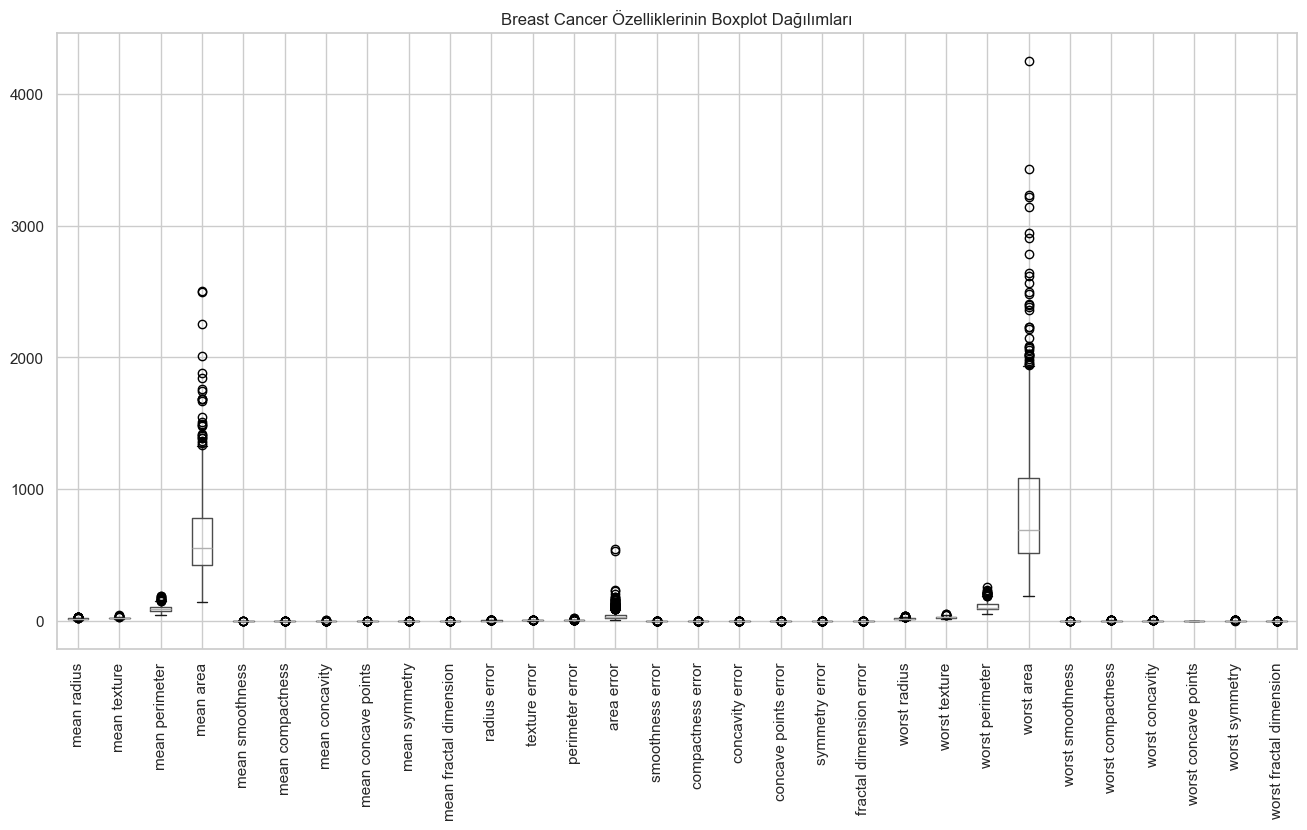

In [8]:
# Aykırı Değer Analizi ve Boxplot #

import numpy as np

# IQR yöntemi ile aykırı değer incelemesi
Q1 = df.drop(columns="target").quantile(0.25)
Q3 = df.drop(columns="target").quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri belirleyen mask #
outlier_mask = ((df.drop(columns="target") < (Q1 - 1.5 * IQR)) |
                (df.drop(columns="target") > (Q3 + 1.5 * IQR)))

# Aykırı değer sayısı #
outlier_counts = outlier_mask.sum()

outlier_counts

plt.figure(figsize=(16, 8))
df.drop(columns="target").boxplot()
plt.xticks(rotation=90)
plt.title("Breast Cancer Özelliklerinin Boxplot Dağılımları")
plt.show()


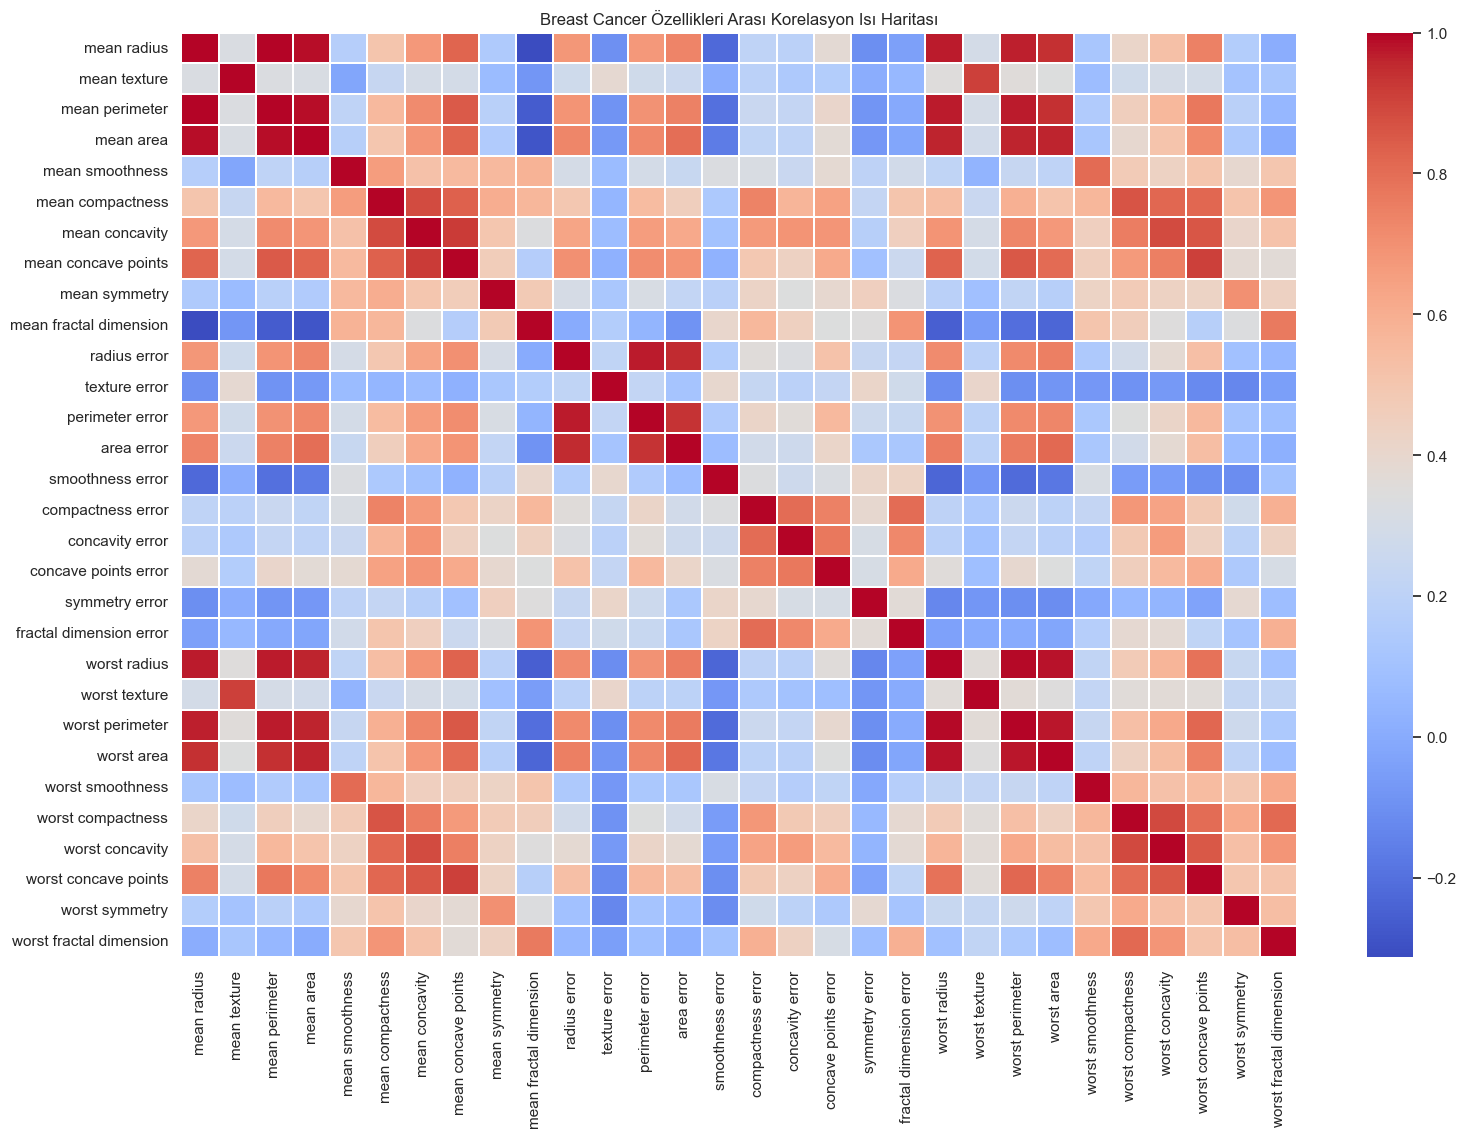

In [10]:
# Korelasyon Matrisi ve Heatmap #

plt.figure(figsize=(18, 12))
corr = df.drop(columns="target").corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.1)
plt.title("Breast Cancer Özellikleri Arası Korelasyon Isı Haritası")
plt.show()


In [11]:
# Veri Ölçekleme #

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Hedef değişkeni çıkartarak yalnızca özellikleri ölçekliyoruz
X_scaled = scaler.fit_transform(df.drop(columns="target"))

X_scaled[:5]   # İlk 5 satırı görmek için


array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [12]:
# Veri Setinin Bölünmesi #

from sklearn.model_selection import train_test_split

# %70 train + %30 temp olarak ayırma yapılır #
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# temp (%30) kısmını %10 validation ve %20 test olarak#
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)

# Boyutlar #
len(X_train), len(X_val), len(X_test)


(398, 57, 114)

In [13]:
# PCA Analizi #

from sklearn.decomposition import PCA

# PCA modelini oluşturma #
pca = PCA()
pca_fit = pca.fit(X_train)

# PCA bileşenlerinin açıkladığı varyans oranları hesaplama #
explained_variance = pca.explained_variance_ratio_

explained_variance


array([4.41069409e-01, 2.01535725e-01, 8.85213050e-02, 6.84715379e-02,
       5.66663555e-02, 4.12157824e-02, 2.06165920e-02, 1.53177745e-02,
       1.19126693e-02, 1.00983615e-02, 8.96900867e-03, 8.46162035e-03,
       7.40867886e-03, 5.17520875e-03, 2.97654499e-03, 2.53214292e-03,
       1.92617483e-03, 1.51153379e-03, 1.13678208e-03, 9.37099524e-04,
       8.84608593e-04, 7.36117802e-04, 5.74923155e-04, 4.85963221e-04,
       3.64407706e-04, 2.46654301e-04, 1.72427022e-04, 5.40023772e-05,
       1.63610327e-05, 4.22758184e-06])

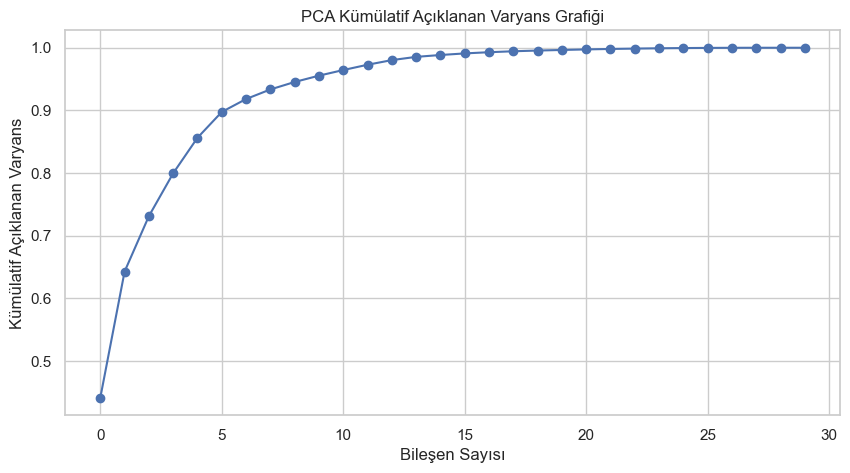

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("PCA Kümülatif Açıklanan Varyans Grafiği")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Açıklanan Varyans")
plt.grid(True)
plt.show()



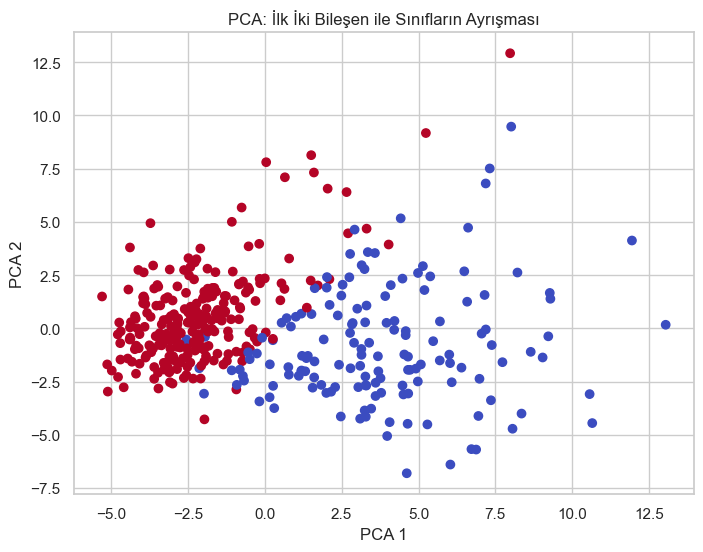

In [15]:
# PCA'yı 2 bileşene indirme #
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap="coolwarm")
plt.title("PCA: İlk İki Bileşen ile Sınıfların Ayrışması")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [16]:
# LDA Analizi #

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA modelini 2 bileşene indiriyoruz (binary sınıf olduğu için max = 1'dir)
lda = LDA(n_components=1)

X_lda = lda.fit_transform(X_train, y_train)

X_lda[:5]


array([[0.20387052],
       [2.98142439],
       [2.39961894],
       [1.49957027],
       [2.01372758]])

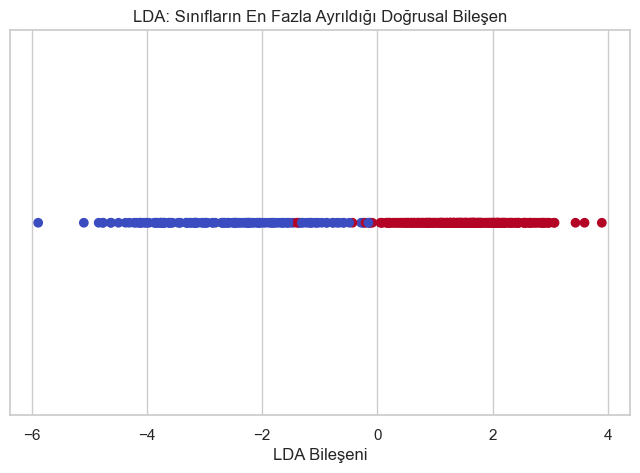

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda), c=y_train, cmap="coolwarm")
plt.title("LDA: Sınıfların En Fazla Ayrıldığı Doğrusal Bileşen")
plt.xlabel("LDA Bileşeni")
plt.yticks([])
plt.show()


In [21]:
# Makine Öğrenmesi Modellerinin Eğitilmesi #

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeller #
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "GaussianNB": GaussianNB()
}

# PCA ve LDA temsilleri #
pca_model = PCA(n_components=5)
X_train_pca = pca_model.fit_transform(X_train)
X_val_pca = pca_model.transform(X_val)

lda_model = LDA(n_components=1)
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_val_lda = lda_model.transform(X_val)

# Sonuçlar #
results = []

def evaluate(model, Xtr, ytr, Xv, yv, rep_name):
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xv)
    
    acc = accuracy_score(yv, y_pred)
    prec = precision_score(yv, y_pred)
    rec = recall_score(yv, y_pred)
    f1 = f1_score(yv, y_pred)
    auc = roc_auc_score(yv, y_pred)
    
    results.append([rep_name, acc, prec, rec, f1, auc])


# Ham Veri #
for name, model in models.items():
    evaluate(model, X_train, y_train, X_val, y_val, f"Ham - {name}")

# PCA Veri #
for name, model in models.items():
    evaluate(model, X_train_pca, y_train, X_val_pca, y_val, f"PCA - {name}")

# LDA Veri #
for name, model in models.items():
    evaluate(model, X_train_lda, y_train, X_val_lda, y_val, f"LDA - {name}")


# Sonuç tablosu #
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
)

results_df


Model  Accuracy  Precision    Recall        F1  \
0   Ham - Logistic Regression  1.000000   1.000000  1.000000  1.000000   
1         Ham - Decision Tree  0.912281   0.969697  0.888889  0.927536   
2         Ham - Random Forest  0.964912   1.000000  0.944444  0.971429   
3               Ham - XGBoost  0.982456   0.972973  1.000000  0.986301   
4            Ham - GaussianNB  0.964912   0.972222  0.972222  0.972222   
5   PCA - Logistic Regression  0.982456   0.972973  1.000000  0.986301   
6         PCA - Decision Tree  0.929825   0.944444  0.944444  0.944444   
7         PCA - Random Forest  0.964912   0.972222  0.972222  0.972222   
8               PCA - XGBoost  0.964912   0.972222  0.972222  0.972222   
9            PCA - GaussianNB  0.947368   0.945946  0.972222  0.958904   
10  LDA - Logistic Regression  0.982456   0.972973  1.000000  0.986301   
11        LDA - Decision Tree  0.982456   0.972973  1.000000  0.986301   
12        LDA - Random Forest  0.982456   0.972973  1.000000  0.986301   
13              LDA - XGBoost  1.000000   1.000000  1.000000  1.000000   
14           LDA - GaussianNB  0.982456   0.972973  1.000000  0.986301   

     ROC-AUC  
0   1.000000  
1   0.920635  
2   0.972222  
3   0.976190  
4   0.962302  
5   0.976190  
6   0.924603  
7   0.962302  
8   0.962302  
9   0.938492  
10  0.976190  
11  0.976190  
12  0.976190  
13  1.000000  
14  0.976190

In [44]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["Temsil", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
)

results_df


Temsil  Accuracy  Precision    Recall        F1  \
0   Ham - Logistic Regression  1.000000   1.000000  1.000000  1.000000   
1         Ham - Decision Tree  0.912281   0.969697  0.888889  0.927536   
2         Ham - Random Forest  0.964912   1.000000  0.944444  0.971429   
3               Ham - XGBoost  0.982456   0.972973  1.000000  0.986301   
4            Ham - GaussianNB  0.964912   0.972222  0.972222  0.972222   
5   PCA - Logistic Regression  0.982456   0.972973  1.000000  0.986301   
6         PCA - Decision Tree  0.929825   0.944444  0.944444  0.944444   
7         PCA - Random Forest  0.964912   0.972222  0.972222  0.972222   
8               PCA - XGBoost  0.964912   0.972222  0.972222  0.972222   
9            PCA - GaussianNB  0.947368   0.945946  0.972222  0.958904   
10  LDA - Logistic Regression  0.982456   0.972973  1.000000  0.986301   
11        LDA - Decision Tree  0.982456   0.972973  1.000000  0.986301   
12        LDA - Random Forest  0.982456   0.972973  1.000000  0.986301   
13              LDA - XGBoost  1.000000   1.000000  1.000000  1.000000   
14           LDA - GaussianNB  0.982456   0.972973  1.000000  0.986301   

     ROC-AUC  
0   1.000000  
1   0.920635  
2   0.972222  
3   0.976190  
4   0.962302  
5   0.976190  
6   0.924603  
7   0.962302  
8   0.962302  
9   0.938492  
10  0.976190  
11  0.976190  
12  0.976190  
13  1.000000  
14  0.976190

In [47]:
#  En iyi modeli seçme #

# ROC-AUC'a göre en yüksek satır index'i alma #
best_idx = results_df["ROC-AUC"].idxmax()

print("En iyi satır index:", best_idx)
print("\nEn iyi satır bilgisi:\n", results_df.loc[best_idx])

# Modeller sözlüğündeki sıraya göre model alma #
model_names = list(models.keys())   # ör: ["lr", "dt", "rf", "xgb", "gnb", "lda", "qda"]

best_key = model_names[best_idx]    # index ile eşleştir

print("\nSeçilen Model Sözlük Anahtarı:", best_key)

best_model = models[best_key]

print("\nSeçilen Gerçek Model:", best_model)


En iyi satır index: 0

En iyi satır bilgisi:
 Temsil       Ham - Logistic Regression
Accuracy                           1.0
Precision                          1.0
Recall                             1.0
F1                                 1.0
ROC-AUC                            1.0
Name: 0, dtype: object

Seçilen Model Sözlük Anahtarı: Logistic Regression

Seçilen Gerçek Model: LogisticRegression(max_iter=500)


In [51]:
from sklearn.metrics import classification_report

print("\nTEST TAHMİNİ VE RAPOR ")

#  En iyi model adını code block 1'den aldım 
best_model_name = "logistic regression"

#  Model sözlüğünü yeniden oluşturdum #
models_clean = {
    "logistic regression": LogisticRegression(max_iter=500),
    "decision tree": DecisionTreeClassifier(),
    "random forest": RandomForestClassifier(),
    "xgboost": XGBClassifier(),
    "gaussiannb": GaussianNB()
}

# En iyi modeli baştan eğit (BÖYLECE FEATURE SAYISI %100 DOĞRU OLUR) #
best_model = models_clean[best_model_name]
best_model.fit(X_train, y_train)

print("\nSeçilen Gerçek Model:", best_model)

# Tahmin yapma #
y_pred = best_model.predict(X_test)

# Rapor yazdırma #
print("\nCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))



TEST TAHMİNİ VE RAPOR 

Seçilen Gerçek Model: LogisticRegression(max_iter=500)

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [52]:
from sklearn.metrics import confusion_matrix

print("\nCONFUSION MATRIX ")

cm = confusion_matrix(y_test, y_pred)
cm



CONFUSION MATRIX 


array([[41,  2],
       [ 1, 70]])

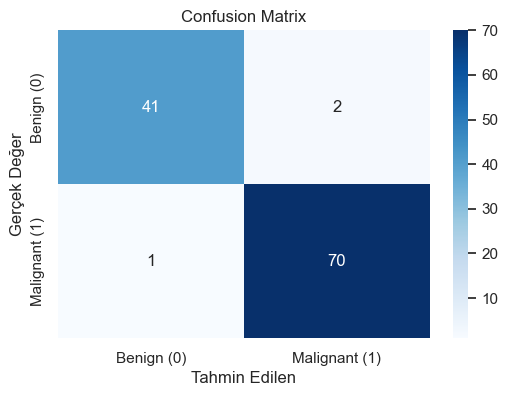

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesaplama #
cm = confusion_matrix(y_test, y_pred)

# Görsel boyutu #
plt.figure(figsize=(6,4))

# Heatmap çiz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])

plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()


ROC-AUC Skoru: 0.997


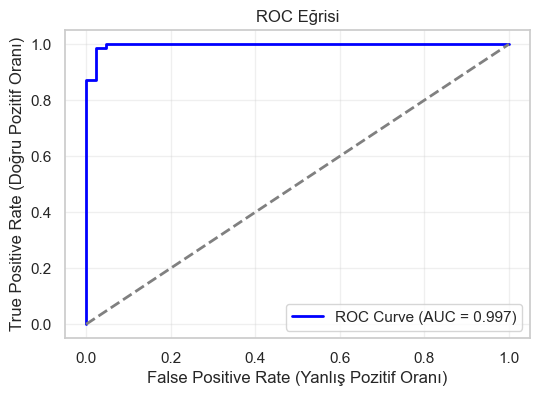

In [55]:
#  ROC Curve ve AUC Hesaplama #
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tahmin olasılıklarını alma durumu (pozitif sınıf: 1) #
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC eğrisi için fpr ve tpr değerlerini hesaplama durumu #
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC skorunu hesaplama işlemi #
roc_auc = auc(fpr, tpr)

print("ROC-AUC Skoru:", round(roc_auc, 3))

# ROC Eğrisi Çizimi #
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC Curve (AUC = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")  # Random tahmin çizgisi
plt.xlabel("False Positive Rate (Yanlış Pozitif Oranı)")
plt.ylabel("True Positive Rate (Doğru Pozitif Oranı)")
plt.title("ROC Eğrisi")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


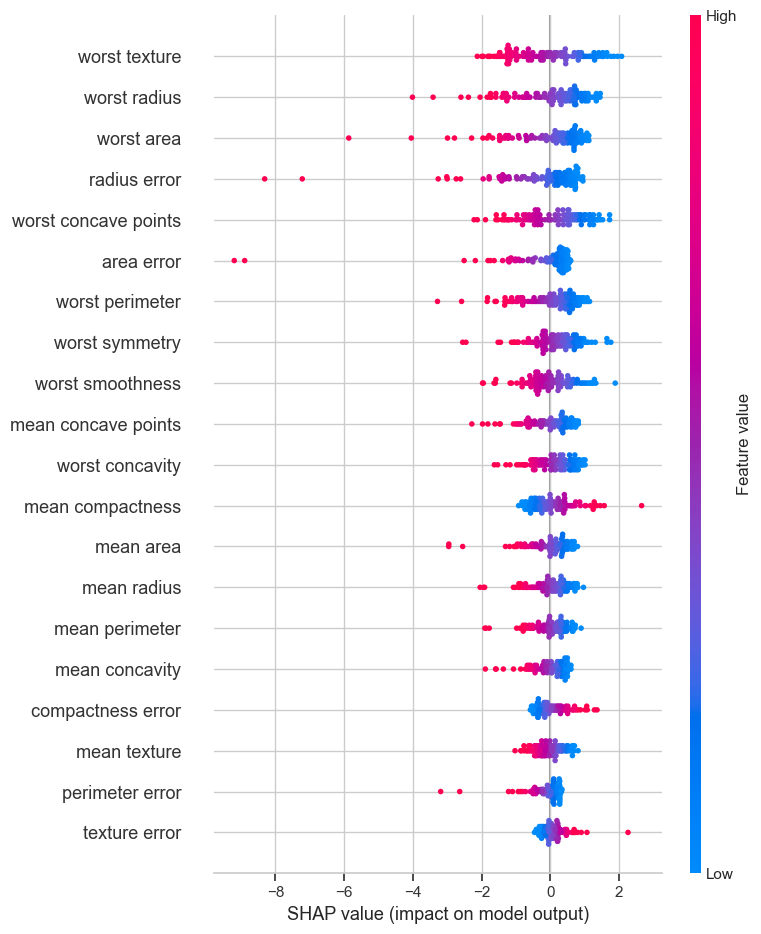

In [59]:
import pandas as pd
import shap

# Özellik isimlerini alarak #
feature_names = df.drop("target", axis=1).columns.tolist()

#  Train ve Test verilerini DataFrame'e dönüştürerek #
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

# SHAP Explainer oluşturma#
explainer = shap.Explainer(best_model, X_train_df)

# SHAP değerlerini hesaplama #
shap_values = explainer(X_test_df)

# SHAP Summary Plot #
shap.summary_plot(shap_values, X_test_df, feature_names=feature_names)


In [65]:
# LIME Açıklanabilirlik Analizi #

#  lime eğer yoksa otomatik kurma kodum #
import sys
import subprocess

try:
    import lime
except ModuleNotFoundError:
    print("LIME bulunamadı. Kurulum yapılıyor...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lime"])
    import lime

#  Gerekli paketleri#
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Özellik isimlerini alır (X_df varsa ondan, yoksa X_train DataFrame'e çevrilir) #
try:
    feature_names = X_df.columns.tolist()
except:
    import pandas as pd
    X_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
    feature_names = X_df.columns.tolist()

# 4) LIME Explainer oluştur
lime_explainer = LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = feature_names,
    class_names = ["Benign (0)", "Malignant (1)"],
    mode = "classification"
)

# Test setinden bir örnek seçerek #
test_index = 5
sample = X_test[test_index].reshape(1, -1)

# Açıklama üreterek  işlem yapma #
lime_exp = lime_explainer.explain_instance(
    data_row = X_test[test_index],
    predict_fn = best_model.predict_proba
)

#  Notebook içinde gösterme #
lime_exp.show_in_notebook(show_table=True)


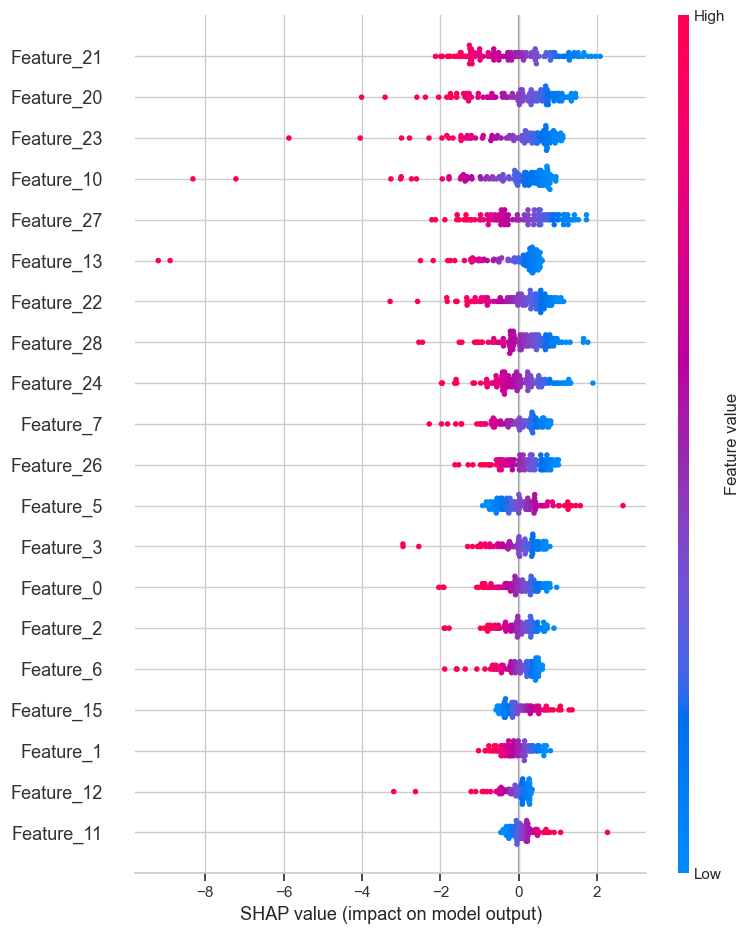

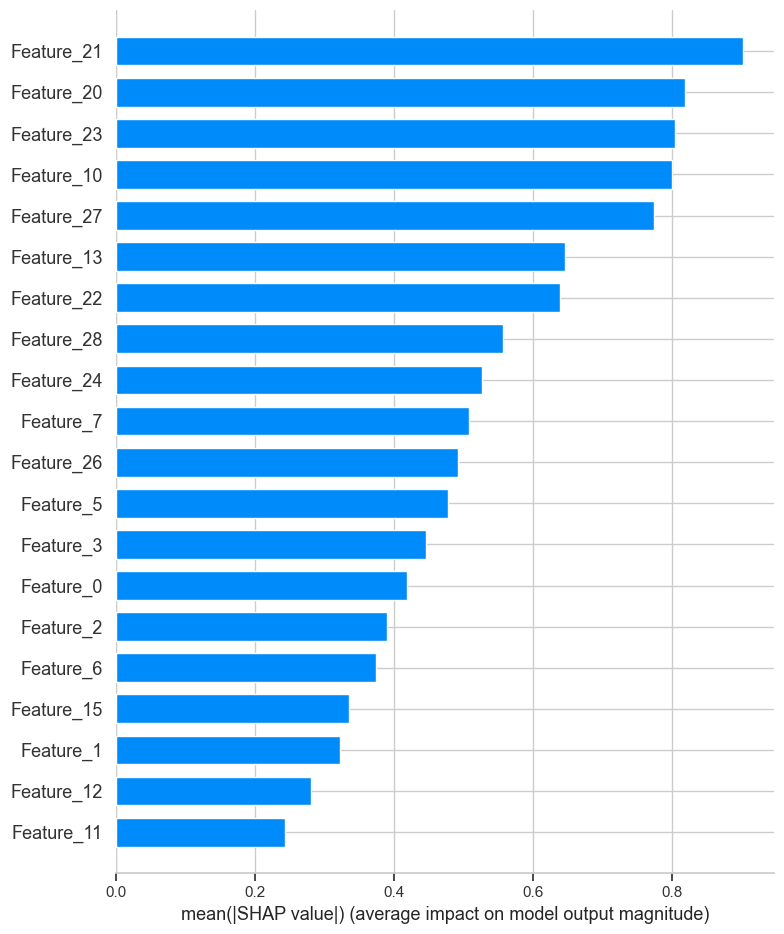

In [67]:

# XAI – Açıklanabilirlik Analizi #


import numpy as np
import shap
from lime.lime_tabular import LimeTabularExplainer

feature_names = X_df.columns.tolist()

#  LIME Açıklanabilirlik #


# LIME Explainer oluşturma #
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=["Benign (0)", "Malignant (1)"],
    mode="classification"
)

# Test setinden bir örnek seçme #
test_index = 5
sample = X_test[test_index].reshape(1, -1)

# LIME açıklama üretme #
lime_exp = lime_explainer.explain_instance(
    data_row=X_test[test_index],
    predict_fn=best_model.predict_proba
)

# LIME görselleştirme #
lime_exp.show_in_notebook(show_table=True)


#  SHAP Açıklanabilirlik #


# SHAP değerleri için Explainer yapma #
explainer = shap.Explainer(best_model, X_train, feature_names=feature_names)

# SHAP değerlerini hesaplama 3
shap_values = explainer(X_test)

# SHAP Summary Plot #
shap.summary_plot(shap_values.values, X_test, feature_names=feature_names)

# SHAP Bar Plot #
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")
